<a href="https://colab.research.google.com/github/noyon57/E-commerce-Website/blob/main/DiabetesNEwFullWork(!).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import os

%matplotlib inline

In [ ]:
df = pd.read_csv("Dataset of Diabetes .csv") 

In [ ]:


df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


# **Label Encoder**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df.CLASS= le.fit_transform(df.CLASS.values)
df.Gender= le.fit_transform(df.Gender.values)

In [ ]:
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,735,34221,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,420,47975,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
3,680,87656,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
4,504,34223,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   int64  
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   int64  
dtypes: float64(8), int64(6)
memory usage: 109.5 KB


In [ ]:
df.describe()


,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,340.500000,2.705514e+05,0.567000,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020,2.643000
std,240.397673,3.380758e+06,0.497754,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388,0.923257
min,1.000000,1.230000e+02,0.000000,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000,0.000000
25%,125.750000,2.406375e+04,0.000000,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000,3.000000
50%,300.500000,3.439550e+04,1.000000,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000,3.000000
75%,550.250000,4.538425e+04,1.000000,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000,3.000000
max,800.000000,7.543566e+07,2.000000,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000,4.000000


Visualizing aspects of the **dataset**

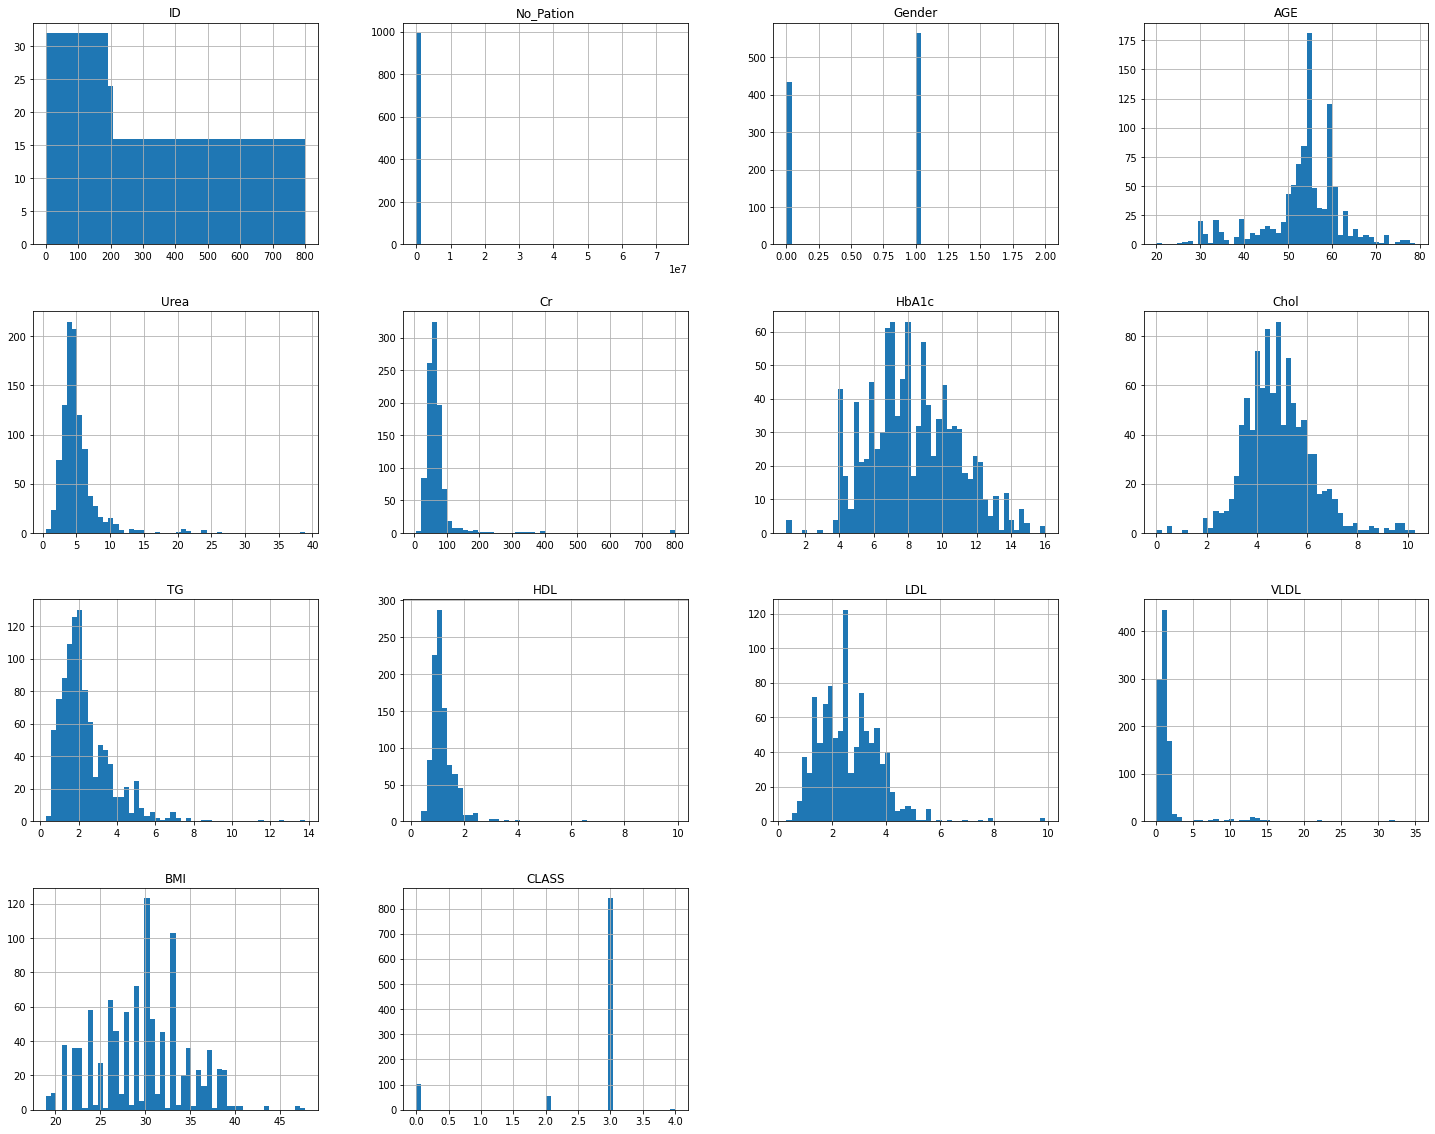

In [ ]:
df.hist(bins=50, figsize=(25, 20))
plt.show()

Removing duplicated data points



```

**bold text**

In [ ]:
df.drop_duplicates(keep='first', inplace=True)

**Creating a test set**

In [ ]:
original_train_df, test_df = train_test_split(df, test_size=0.2)

# To be sure we will create a copy for further processing
train_df = original_train_df.copy() 

Gaining further insight
**bold text**

In [ ]:
correlation_matrix = train_df.corr(method='pearson')

correlation_matrix

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
ID,1.000000,0.073598,0.010478,-0.095114,-0.082192,-0.095660,-0.015949,0.019863,-0.057859,-0.002873,-0.044223,0.157147,0.028714,-0.067091
No_Pation,0.073598,1.000000,0.058529,-0.097737,-0.021827,0.002815,-0.036833,-0.034374,-0.046545,-0.014027,-0.005131,0.126007,0.020794,-0.055660
Gender,0.010478,0.058529,1.000000,0.031302,0.078201,0.138771,0.006765,-0.086999,0.056199,-0.108879,0.043115,0.193611,0.068914,0.121685
AGE,-0.095114,-0.097737,0.031302,1.000000,0.154174,0.077024,0.397033,0.022151,0.174924,-0.012489,0.019098,-0.081391,0.365520,0.410021
Urea,-0.082192,-0.021827,0.078201,0.154174,1.000000,0.650995,-0.010073,0.019571,0.072628,-0.055350,-0.028418,0.002561,0.073803,0.082746
Cr,-0.095660,0.002815,0.138771,0.077024,0.650995,1.000000,-0.052265,0.014370,0.081486,-0.030581,0.046114,0.023833,0.075654,0.045459
HbA1c,-0.015949,-0.036833,0.006765,0.397033,-0.010073,-0.052265,1.000000,0.171967,0.219467,0.029546,0.034838,0.079298,0.424312,0.555245
Chol,0.019863,-0.034374,-0.086999,0.022151,0.019571,0.014370,0.171967,1.000000,0.322244,0.093943,0.417743,0.048449,0.011233,0.153681
TG,-0.057859,-0.046545,0.056199,0.174924,0.072628,0.081486,0.219467,0.322244,1.000000,-0.077466,0.003038,0.142003,0.135504,0.197266
HDL,-0.002873,-0.014027,-0.108879,-0.012489,-0.055350,-0.030581,0.029546,0.093943,-0.077466,1.000000,-0.117993,-0.059821,0.069323,0.000123


In [ ]:
correlation_matrix["CLASS"].sort_values()


ID          -0.067091
No_Pation   -0.055660
HDL          0.000123
LDL          0.011979
Cr           0.045459
Urea         0.082746
VLDL         0.104219
Gender       0.121685
Chol         0.153681
TG           0.197266
AGE          0.410021
BMI          0.555134
HbA1c        0.555245
CLASS        1.000000
Name: CLASS, dtype: float64

Handling missing data

In [ ]:
names = ['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']

for name in names:
    train_df[name].replace(0, np.nan, inplace=True)

In [ ]:
train_df.head()


,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
143,712,87672,1.0,50,3.5,59,6.0,4.0,2.1,1.4,1.9,0.9,25.0,2
345,335,24083,1.0,58,4.8,60,5.5,0.6,2.5,1.1,2.0,0.6,38.0,3
538,480,7687,1.0,53,5.2,59,7.8,4.9,2.1,0.9,3.2,0.9,33.0,3
707,388,34497,1.0,55,4.0,64,9.7,5.3,3.6,0.7,3.1,1.6,32.0,3
749,571,34521,1.0,52,7.5,90,10.5,3.0,1.5,0.6,2.2,0.7,35.0,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   int64  
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   int64  
dtypes: float64(8), int64(6)
memory usage: 117.2 KB


In [ ]:
id_median = train_df["ID"].median()
no_pation_median = train_df["No_Pation"].median()
gender_median = train_df["Gender"].median()
age_median = train_df["AGE"].median()
urea_median = train_df["Urea"].median()
cr_median = train_df["Cr"].median()
hba1c_median = train_df['HbA1c'].median()
chol_median = train_df['Chol'].median()
tg_median = train_df['TG'].median()
hdl_median = train_df['HDL'].median()
ldl_median = train_df['LDL'].median()
vldl_median = train_df['VLDL'].median()
bmi_median = train_df['BMI'].median()

train_df["ID"].fillna(id_median, inplace=True)
train_df["No_Pation"].fillna(no_pation_median, inplace=True)
train_df["Gender"].fillna(gender_median, inplace=True)
train_df["AGE"].fillna(age_median, inplace=True)
train_df["Urea"].fillna(urea_median, inplace=True)
train_df["Cr"].fillna(cr_median, inplace=True)
train_df["HbA1c"].fillna(hba1c_median, inplace=True)
train_df["Chol"].fillna(chol_median, inplace=True)
train_df["TG"].fillna(tg_median, inplace=True)
train_df["HDL"].fillna(hdl_median, inplace=True)
train_df["LDL"].fillna(ldl_median, inplace=True)
train_df["VLDL"].fillna(vldl_median, inplace=True)
train_df["BMI"].fillna(bmi_median, inplace=True)

In [ ]:
train_df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
143,712,87672,1.0,50,3.5,59,6.0,4.0,2.1,1.4,1.9,0.9,25.0,2
345,335,24083,1.0,58,4.8,60,5.5,0.6,2.5,1.1,2.0,0.6,38.0,3
538,480,7687,1.0,53,5.2,59,7.8,4.9,2.1,0.9,3.2,0.9,33.0,3
707,388,34497,1.0,55,4.0,64,9.7,5.3,3.6,0.7,3.1,1.6,32.0,3
749,571,34521,1.0,52,7.5,90,10.5,3.0,1.5,0.6,2.2,0.7,35.0,3


**Encoding categorial attributes**

In [ ]:
# Copy original dataframe and add new column with random fitness values
temp_df = train_df.copy()
fitness_values = ["bad", "moderate", "good", "very good",]
temp_df['fitness'] = np.random.choice(fitness_values, temp_df.shape[0])

temp_df.head(5)

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS,fitness
143,712,87672,1.0,50,3.5,59,6.0,4.0,2.1,1.4,1.9,0.9,25.0,2,bad
345,335,24083,1.0,58,4.8,60,5.5,0.6,2.5,1.1,2.0,0.6,38.0,3,moderate
538,480,7687,1.0,53,5.2,59,7.8,4.9,2.1,0.9,3.2,0.9,33.0,3,very good
707,388,34497,1.0,55,4.0,64,9.7,5.3,3.6,0.7,3.1,1.6,32.0,3,good
749,571,34521,1.0,52,7.5,90,10.5,3.0,1.5,0.6,2.2,0.7,35.0,3,moderate


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
fitness_encoded = encoder.fit_transform(temp_df["fitness"])

for id_, class_ in enumerate(encoder.classes_):
    print(f"class id {id_} has label {class_}")

print()
print(f"Encoded fitness values for first 10 entries: {fitness_encoded[:10]}")

class id 0 has label bad
class id 1 has label good
class id 2 has label moderate
class id 3 has label very good

Encoded fitness values for first 10 entries: [0 2 3 1 2 1 3 2 2 3]


**Rescaling or standardizing attributes**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# initialize min-max scaler
mm_scaler = MinMaxScaler()

temp1_df = train_df.copy()
column_names = temp1_df.columns.tolist()

# transform all attributes
temp1_df[column_names] = mm_scaler.fit_transform(temp1_df[column_names])

temp1_df.sort_index(inplace=True)
temp1_df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
1,0.918648,0.000452,0.0,0.101695,0.170213,0.053846,0.264901,0.319588,0.081481,0.092784,0.187500,0.014925,0.139130,0.0
2,0.524406,0.000634,0.0,0.508475,0.178723,0.033333,0.264901,0.371134,0.044444,0.226804,0.114583,0.011940,0.173913,0.0
3,0.849812,0.001160,0.0,0.508475,0.178723,0.033333,0.264901,0.371134,0.044444,0.226804,0.114583,0.011940,0.173913,0.0
4,0.629537,0.000452,0.0,0.220339,0.280851,0.033333,0.264901,0.443299,0.051852,0.061856,0.177083,0.008955,0.069565,0.0
5,0.792240,0.000452,0.0,0.423729,0.076596,0.005128,0.205298,0.237113,0.051852,0.082474,0.125000,0.008955,0.069565,0.0


In [ ]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()

temp2_df = train_df.copy()

# transform all attributes
temp2_df[column_names] = mm_scaler.fit_transform(temp2_df[column_names])
temp2_df.sort_index(inplace=True)
temp2_df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
1,0.918648,0.000452,0.0,0.101695,0.170213,0.053846,0.264901,0.319588,0.081481,0.092784,0.187500,0.014925,0.139130,0.0
2,0.524406,0.000634,0.0,0.508475,0.178723,0.033333,0.264901,0.371134,0.044444,0.226804,0.114583,0.011940,0.173913,0.0
3,0.849812,0.001160,0.0,0.508475,0.178723,0.033333,0.264901,0.371134,0.044444,0.226804,0.114583,0.011940,0.173913,0.0
4,0.629537,0.000452,0.0,0.220339,0.280851,0.033333,0.264901,0.443299,0.051852,0.061856,0.177083,0.008955,0.069565,0.0
5,0.792240,0.000452,0.0,0.423729,0.076596,0.005128,0.205298,0.237113,0.051852,0.082474,0.125000,0.008955,0.069565,0.0


In [ ]:
df['CLASS'].value_counts()

3    840
0    102
2     53
4      4
1      1
Name: CLASS, dtype: int64

In [ ]:
df.groupby('CLASS').mean()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
CLASS,,,,,,,,,,,,,
0,367.598039,823514.843137,0.372549,44.294118,4.666667,62.598039,4.551961,4.266667,1.624510,1.230392,2.623529,0.945098,22.352941
1,435.000000,34241.000000,1.000000,38.000000,6.100000,83.000000,5.400000,4.500000,1.700000,0.900000,2.800000,0.800000,24.600000
2,396.056604,64299.037736,0.679245,43.283019,4.511321,66.075472,6.003774,4.579245,2.126415,1.127358,2.493396,0.983019,23.933962
3,333.204762,216783.997619,0.580952,55.386905,5.217432,69.888095,8.881738,4.956095,2.455369,1.207143,2.614929,1.984762,30.793833
4,421.750000,253061.500000,1.000000,38.250000,5.225000,66.750000,8.150000,4.325000,1.750000,1.150000,2.675000,9.550000,34.525000


In [ ]:
X = df.drop( 'CLASS', axis=1)


In [ ]:
print(X)

      ID  No_Pation  Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
0    502      17975       0   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
1    735      34221       1   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6   
2    420      47975       0   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
3    680      87656       0   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
4    504      34223       1   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4   
..   ...        ...     ...  ...   ...  ..    ...   ...  ...  ...  ...   ...   
995  200     454317       1   71  11.0  97    7.0   7.5  1.7  1.2  1.8   0.6   
996  671     876534       1   31   3.0  60   12.3   4.1  2.2  0.7  2.4  15.4   
997  669      87654       1   30   7.1  81    6.7   4.1  1.1  1.2  2.4   8.1   
998   99      24004       1   38   5.8  59    6.7   5.3  2.0  1.6  2.9  14.0   
999  248      24054       1   54   5.0  67    6.9   3.8  1.7  1.1  3.0   0.7   

      BMI  
0    24.0  
1    23.0  
2  

In [ ]:
y = df['CLASS']

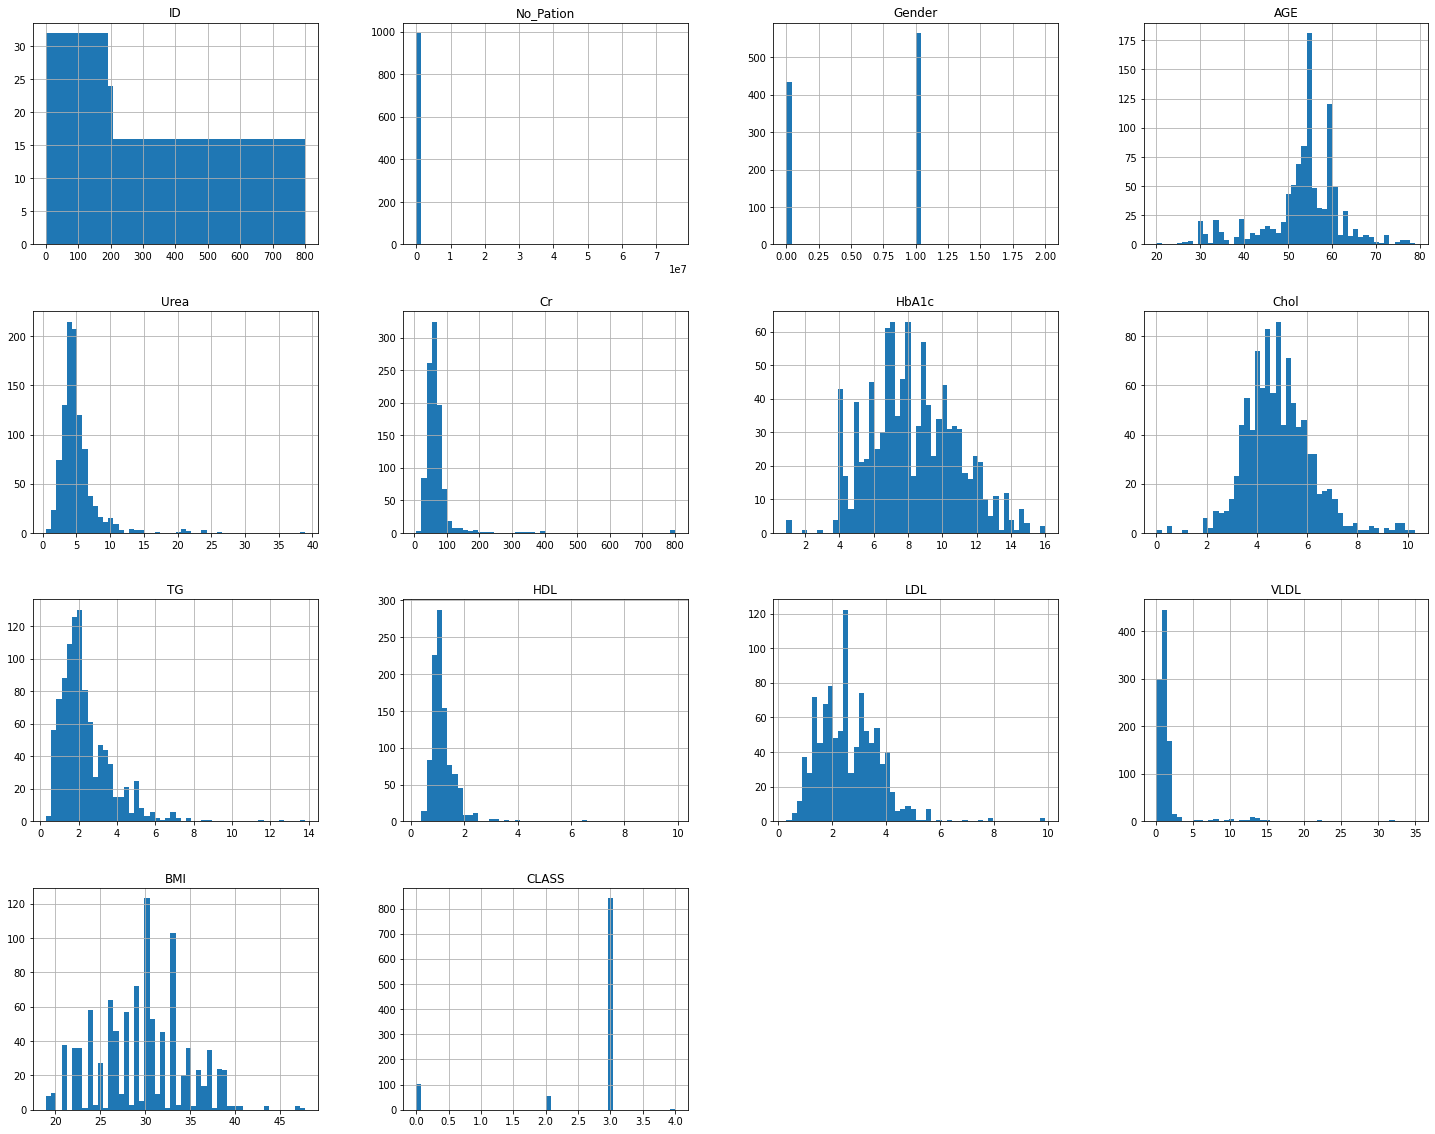

In [ ]:
df.hist(bins=50, figsize=(25, 20))
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .80)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)

In [ ]:
model = abc.fit(X_train, y_train)

In [ ]:
model.score(X_train, y_train)

0.915

In [ ]:
model.score(X_test, y_test)

0.945

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
print(accuracy_score(y_test, y_pred))

0.945


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay


[[ 16   0   0   0]
 [  0   0   8   0]
 [  1   0 173   0]
 [  0   0   2   0]]


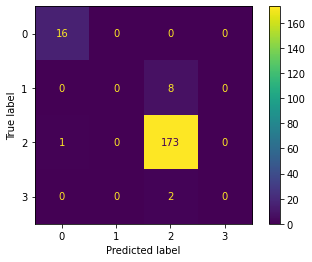

In [ ]:
cm=confusion_matrix(y_test, y_pred)
print(cm)
cm_display = ConfusionMatrixDisplay(cm).plot()


In [ ]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           2       0.00      0.00      0.00         8
           3       0.95      0.99      0.97       174
           4       0.00      0.00      0.00         2

    accuracy                           0.94       200
   macro avg       0.47      0.50      0.48       200
weighted avg       0.90      0.94      0.92       200



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
